In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",sep=',',decimal='.')

In [46]:
from numpy import column_stack


df.info(column_stack)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Preprocessing

In [48]:
df.drop('customerID', axis=1, inplace=True)

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
df["Churn"]= df["Churn"].replace("No","no customer loss occurred") 
df["Churn"]= df["Churn"].replace("Yes","customer loss occurred")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,no customer loss occurred
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,no customer loss occurred
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,customer loss occurred
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,no customer loss occurred
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,customer loss occurred


In [51]:
df["SeniorCitizen"]= df["SeniorCitizen"].replace(0, "No") 
df["SeniorCitizen"]= df["SeniorCitizen"].replace(1, "Yes") 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,no customer loss occurred
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,no customer loss occurred
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,customer loss occurred
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,no customer loss occurred
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,customer loss occurred


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [53]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(value=0)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [55]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


no customer loss occurred    5174
customer loss occurred       1869
Name: Churn, dtype: int64

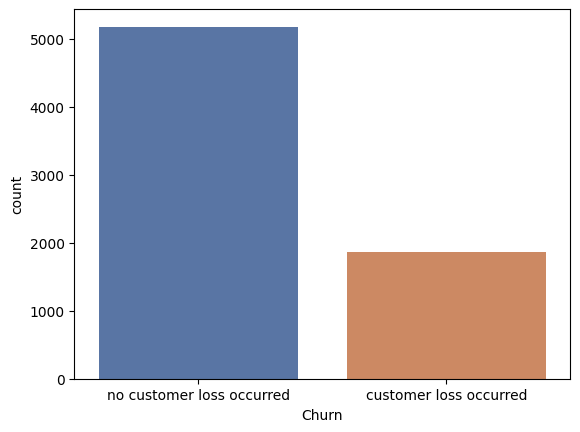

In [56]:
sns.countplot(x = "Churn", data = df)
df.loc[:, 'Churn'].value_counts()

In [57]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [58]:
Categorical = df.select_dtypes(include='object').drop('Churn', axis=1).columns.tolist()
Numerical = df.select_dtypes(exclude='object').columns.tolist()


In [59]:
for c in Categorical:
    print('Column {} unique values: {}'.format(c, len(df[c].unique())))

Column gender unique values: 2
Column SeniorCitizen unique values: 2
Column Partner unique values: 2
Column Dependents unique values: 2
Column PhoneService unique values: 2
Column MultipleLines unique values: 3
Column InternetService unique values: 3
Column OnlineSecurity unique values: 3
Column OnlineBackup unique values: 3
Column DeviceProtection unique values: 3
Column TechSupport unique values: 3
Column StreamingTV unique values: 3
Column StreamingMovies unique values: 3
Column Contract unique values: 3
Column PaperlessBilling unique values: 2
Column PaymentMethod unique values: 4


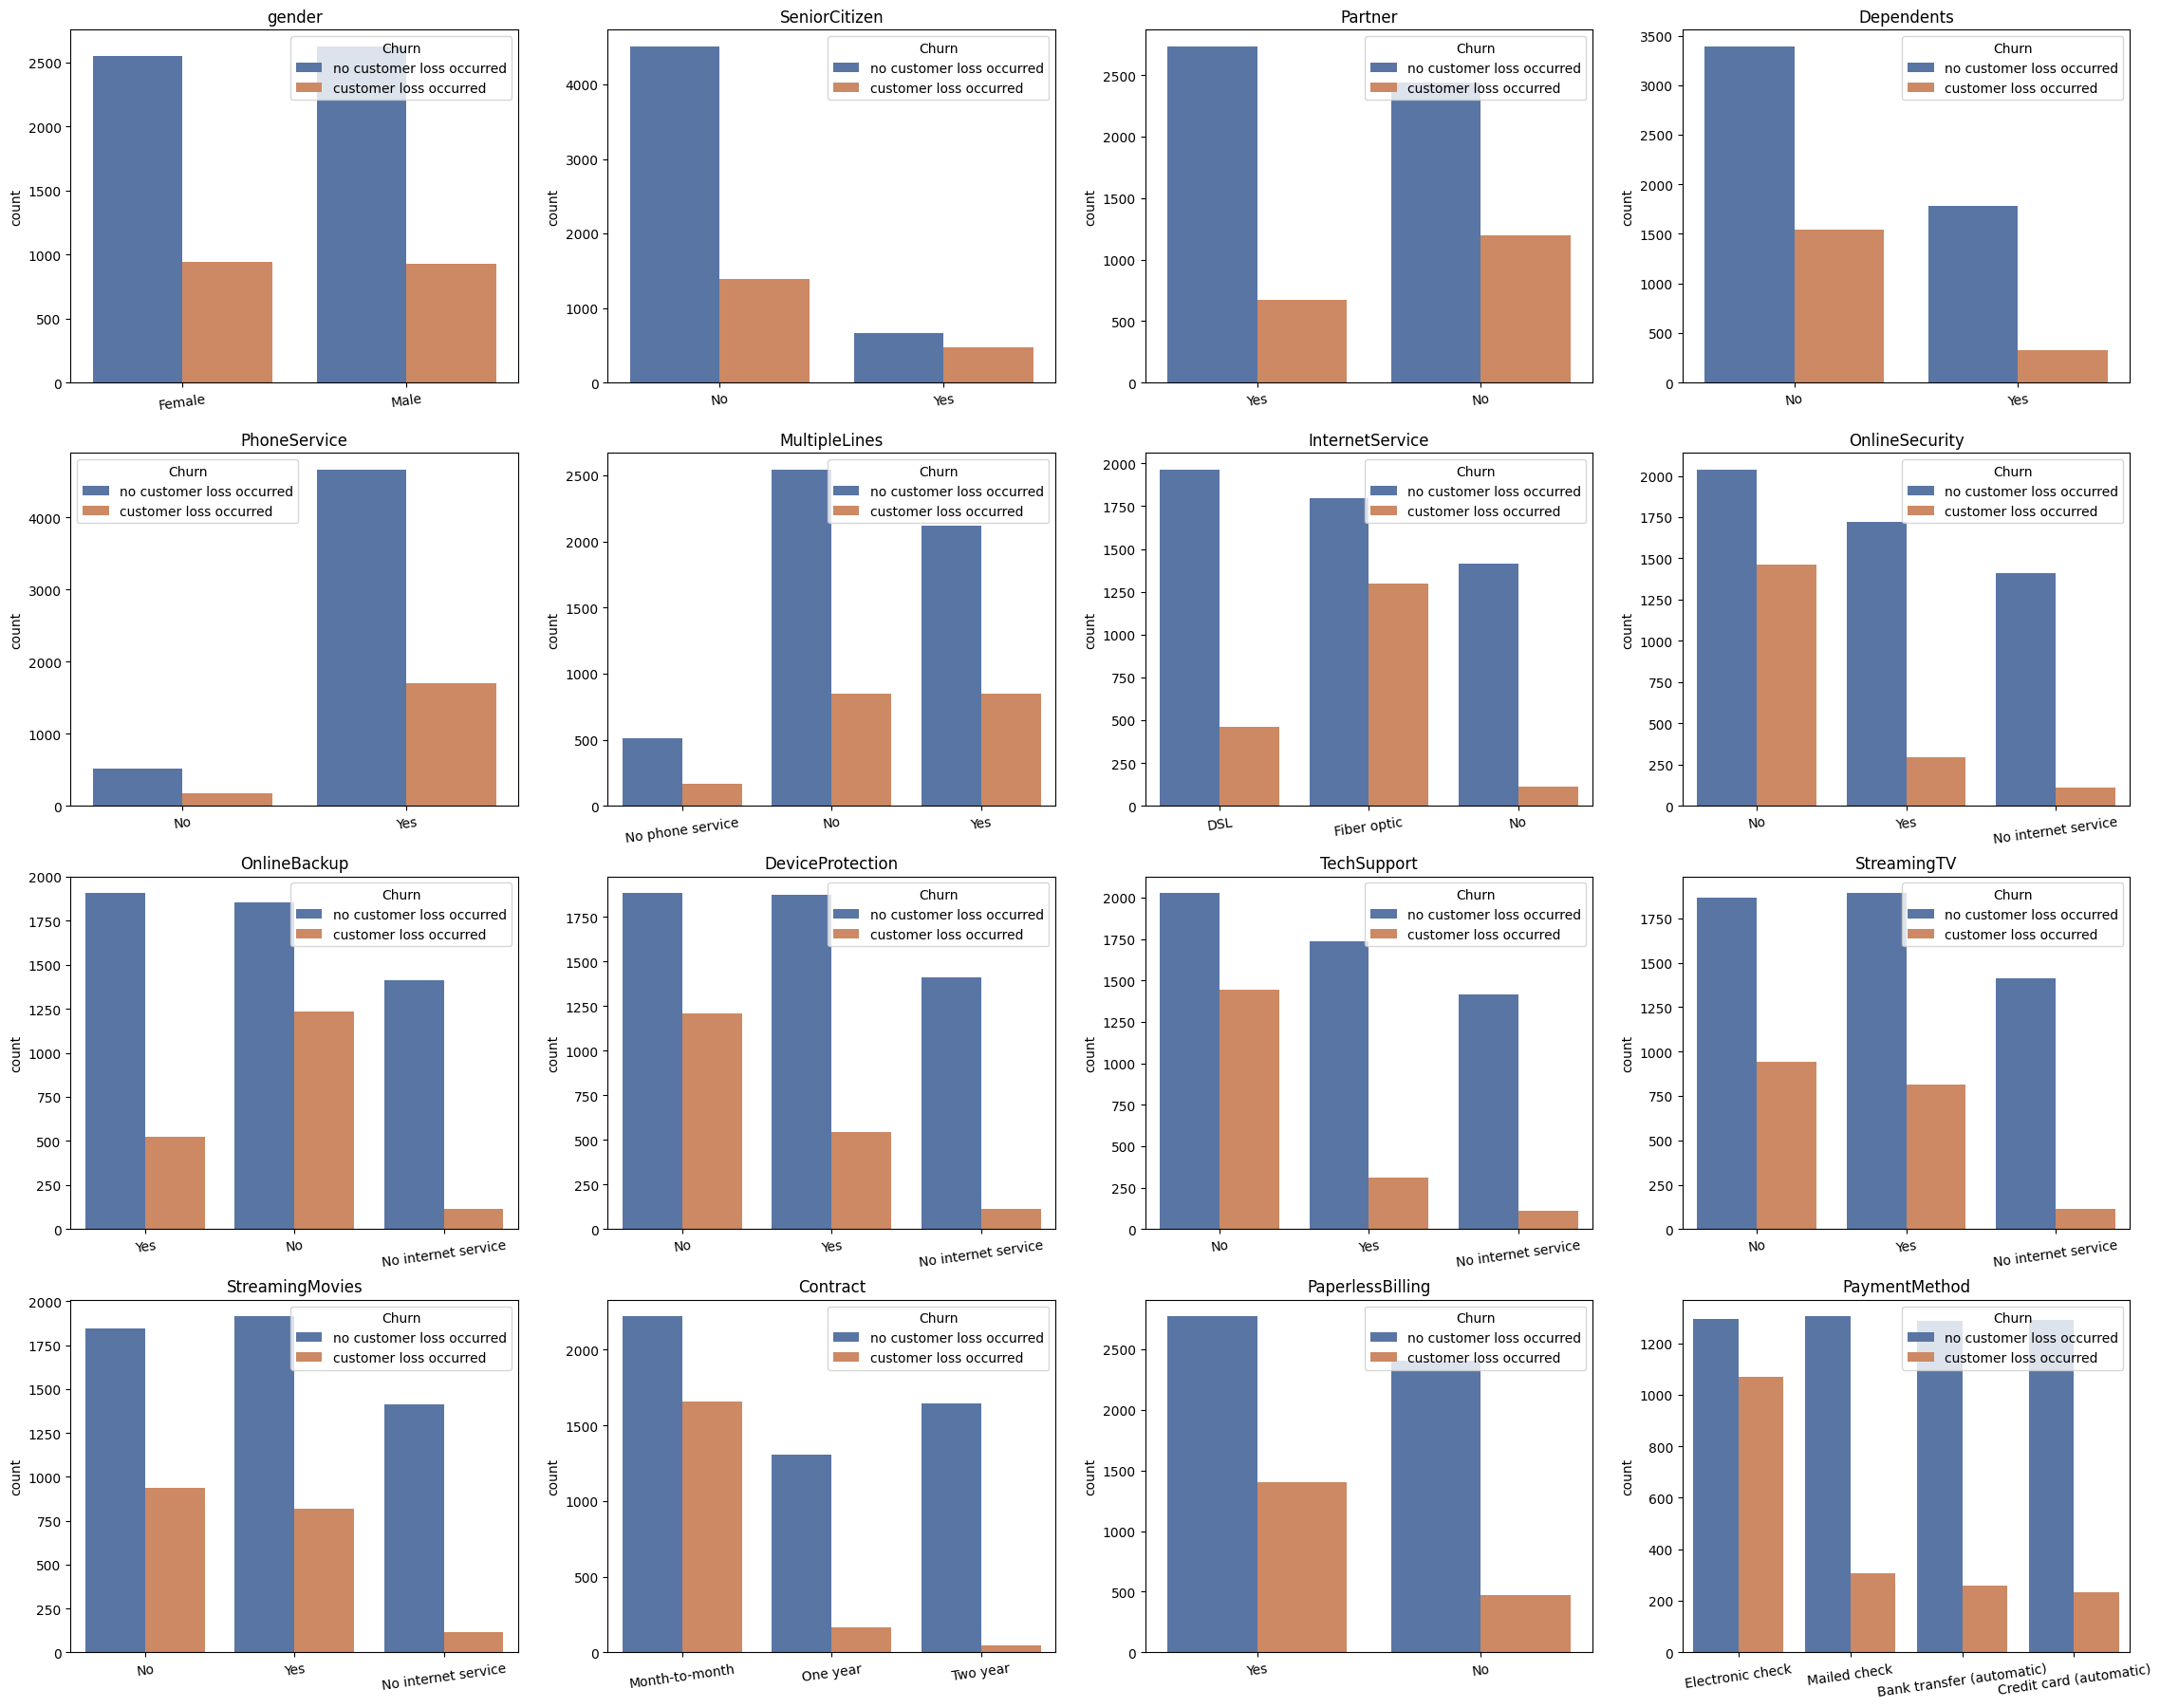

In [60]:
plt.figure(figsize=(28,28))
for i,c in enumerate(Categorical):
    plt.subplot(5,4,i+1)
    sns.set_palette("deep")
    ax=sns.countplot(x=df[c], hue=df['Churn'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=8)
    plt.title(c)
    plt.xlabel('')

C:\Users\turac\AppData\Local\Temp\ipykernel_13244\3714919615.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn'] == 'no customer loss occurred'][c], kde=True, color='blue', hist=False, kde_kws=dict(linewidth=2), label='no customer loss occurred')
C:\Users\turac\AppData\Local\Temp\ipykernel_13244\3714919615.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functi

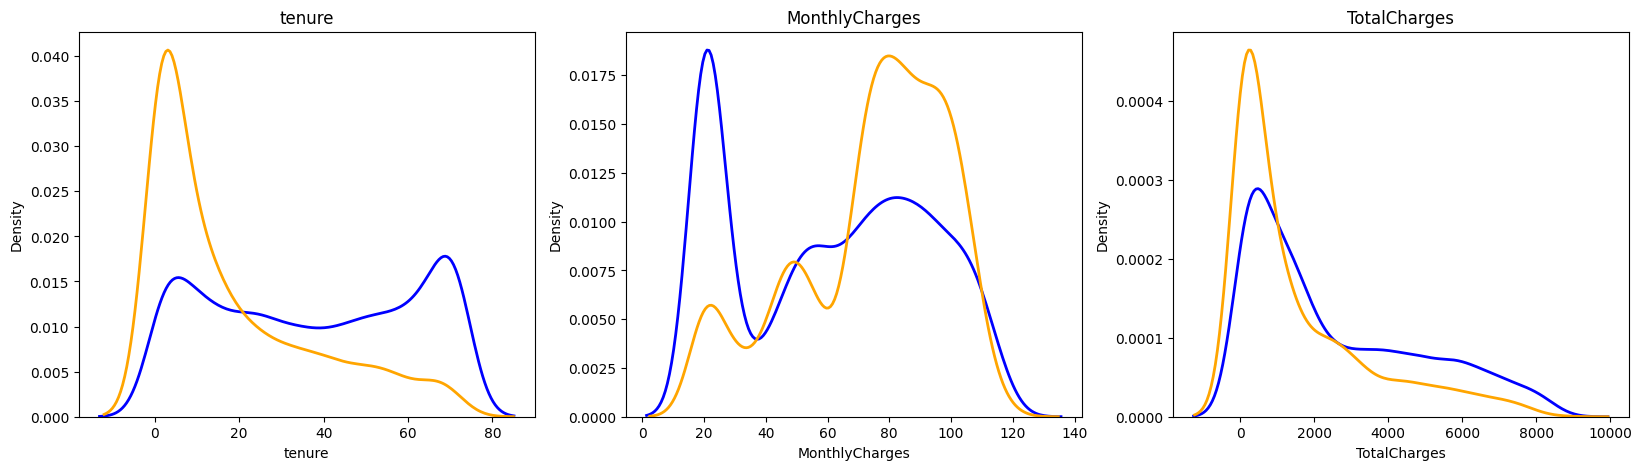

In [61]:
plt.figure(figsize=(20,5))
for i,c in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1,3,i+1)
    sns.distplot(df[df['Churn'] == 'no customer loss occurred'][c], kde=True, color='blue', hist=False, kde_kws=dict(linewidth=2), label='no customer loss occurred')
    sns.distplot(df[df['Churn'] == 'customer loss occurred'][c], kde=True, color='Orange', hist=False, kde_kws=dict(linewidth=2), label='customer loss occurred')
    plt.title(c)

<AxesSubplot: xlabel='tenure', ylabel='Churn'>

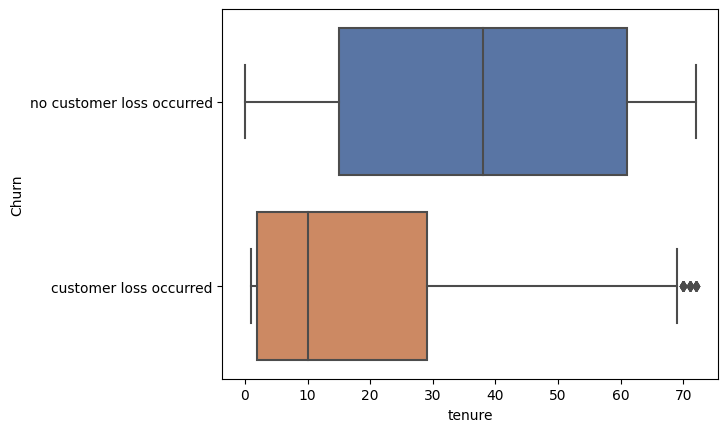

In [62]:
sns.boxplot(x=df['tenure'],y=df['Churn'])

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Churn'>

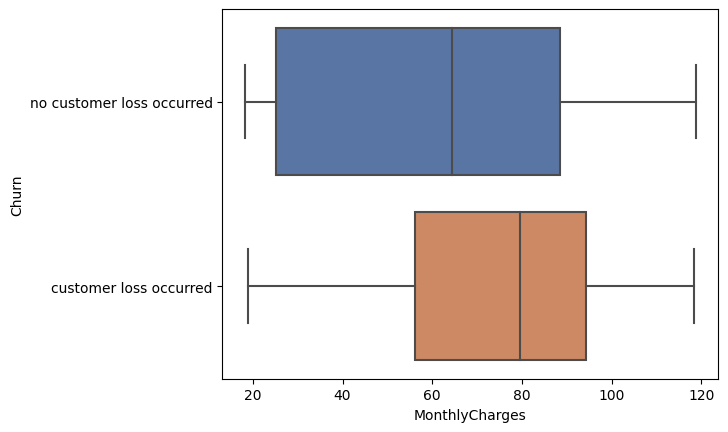

In [63]:
sns.boxplot(x=df['MonthlyCharges'],y=df['Churn'])

<AxesSubplot: xlabel='TotalCharges', ylabel='Churn'>

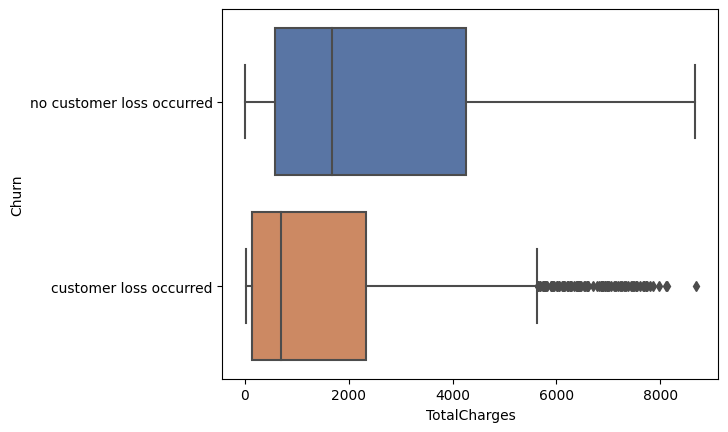

In [64]:
sns.boxplot(x=df['TotalCharges'],y=df['Churn'])

In [65]:
from sklearn.preprocessing import LabelEncoder
encoded = df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,1
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,0
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,1
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,1
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,0
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,1


we will do label encoding. In some features we have more than 2 different value. If we do not have a problem like this we would like to do one hot label encoding.

In [66]:
ChurnHappend=encoded.loc[encoded['Churn'].abs()<1]
ChurnHappend

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,0
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,727.80,0
7026,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,0
7032,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75,0
7034,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,6886.25,0


selected_feature= ChurnHappend
selected_column= ChurnHappend['TotalCharges']

std= selected_column.std()
avg= selected_column.mean()

we will make the three standard deviation (but then we will understand that z-score is not pertinent for us because there are outlier data that we did not expect that much and that is why we can not z-score. In z-score the algorithm effects from outlier data but in the IQR method there is no such kind of problems.)

three_sigma_plus= avg + (3*std)
three_sigma_minus= avg - (3*std)

three_sigma_plus

three_sigma_minus

selected_column[((selected_feature['TotalCharges']>three_sigma_plus)|(selected_feature['TotalCharges']<three_sigma_minus))]

selected_column

### Detection Outlier Data

In [67]:
Q1=ChurnHappend['TotalCharges'].quantile(0.25)
Q3=ChurnHappend['TotalCharges'].quantile(0.75)
IQR= Q3-Q1
IQR

2196.8

In [68]:
Q=Q3+(1.5*IQR)
Q

5626.5

In [69]:
encoded_out = encoded[~((encoded['TotalCharges'] < (Q3 + (1.5 * IQR))))&(encoded['Churn']<1)]
encoded_out.head(8000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
104,1,0,1,0,68,1,2,1,0,2,2,2,2,2,2,1,0,110.00,7611.85,0
339,1,0,1,0,63,1,2,1,0,2,2,0,2,2,0,1,2,103.40,6603.00,0
402,1,0,1,1,69,1,2,1,0,0,2,0,2,2,0,1,1,99.45,7007.60,0
445,0,0,0,0,60,1,2,1,0,2,2,0,2,2,0,1,2,105.90,6396.45,0
609,0,1,1,0,65,1,2,1,2,0,2,0,2,2,0,0,0,105.25,6786.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,1,0,0,0,61,1,2,1,2,0,2,2,2,2,2,1,1,111.60,6876.05,0
6853,0,0,0,0,54,1,2,1,0,2,2,2,2,2,0,0,2,111.10,6014.85,0
6945,1,0,1,1,70,1,2,1,0,2,0,0,2,2,2,0,0,98.30,6859.50,0
6972,0,1,0,0,56,1,2,1,0,2,2,2,2,2,1,1,2,111.95,6418.90,0


In [70]:
encoded.drop(encoded[~((encoded['TotalCharges'] < (Q3 + (1.5 * IQR))))&(encoded['Churn']<1)].index, inplace=True)
encoded.head(8000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,1
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,1
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,1
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,1
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,0


In [71]:
Q1_tenure = ChurnHappend['tenure'].quantile(0.25)
Q3_tenure = ChurnHappend['tenure'].quantile(0.75)
IQR_tenure = Q3_tenure - Q1_tenure
IQR_tenure

27.0

In [72]:
Q_tenure=Q3_tenure+(1.5*IQR_tenure)
Q_tenure

69.5

In [73]:
encoded_tenure_out = encoded[~((encoded['tenure'] < (Q3_tenure + (1.5 * IQR_tenure))))&(encoded['Churn']<1)]
encoded_tenure_out.head(8000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4149,1,0,1,0,71,0,1,0,0,2,0,0,2,2,2,0,2,49.35,3515.25,0
5441,0,0,1,0,70,1,2,0,2,0,2,2,0,0,2,0,1,65.30,4759.75,0
5841,1,1,0,0,70,0,1,0,0,0,0,0,2,2,1,1,2,45.25,3264.45,0
6424,0,0,1,0,72,0,1,0,0,2,2,0,2,2,2,1,2,54.20,3937.45,0


In [74]:
encoded.drop(encoded[~((encoded['tenure'] < (Q3_tenure + (1.5 * IQR_tenure))))&(encoded['Churn']<1)].index, inplace=True)
encoded.head(8000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,1
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,1
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,1
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,1
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,0


In [75]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [76]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

we can do split the data to get train set and test set

### Train-Test-Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x = df.drop('Churn', axis = 1)              
y = df['Churn'] 

we split the data to x and y because we need to compare

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.85, random_state = 400)

In [80]:
x_train.head(8000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2755,Male,No,Yes,No,46,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.60,851.20
5983,Female,No,No,No,22,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.35,1098.85
71,Female,No,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.40,1090.65
6366,Female,No,Yes,No,64,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,68.30,4378.80
2776,Male,Yes,Yes,No,16,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.30,1178.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Female,Yes,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),88.05,6425.65
5049,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.20,20.20
2366,Female,Yes,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,70.15
3535,Male,No,Yes,Yes,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.20,6741.15


In [81]:
x_test.head(8000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1076,Female,No,Yes,Yes,58,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),24.50,1497.90
2395,Female,Yes,Yes,No,31,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,One year,Yes,Electronic check,90.70,2835.50
1969,Female,No,No,No,60,No,No phone service,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Electronic check,53.60,3237.05
2697,Female,No,Yes,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),87.95,6365.35
1108,Female,No,No,No,69,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.60,1678.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,Female,No,No,No,24,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.75,2407.30
2578,Female,Yes,Yes,Yes,31,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.90,2911.30
6716,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.10,228.00
2585,Female,No,No,No,37,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.80,813.30


In [82]:
y_train.head(10)

2755    no customer loss occurred
5983    no customer loss occurred
71      no customer loss occurred
6366    no customer loss occurred
2776       customer loss occurred
5540       customer loss occurred
2405       customer loss occurred
3835    no customer loss occurred
925     no customer loss occurred
5128    no customer loss occurred
Name: Churn, dtype: object

In [83]:
y_test.head(8000)

1076    no customer loss occurred
2395    no customer loss occurred
1969    no customer loss occurred
2697    no customer loss occurred
1108    no customer loss occurred
                  ...            
1473       customer loss occurred
2578       customer loss occurred
6716       customer loss occurred
2585    no customer loss occurred
6628    no customer loss occurred
Name: Churn, Length: 5987, dtype: object

In [84]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,no customer loss occurred


In [85]:
x=encoded['gender']
y=encoded['Churn']
print('gender:', x.corr(y)*100)
x=encoded['SeniorCitizen']
y=encoded['Churn']
print('	SeniorCitizen', x.corr(y)*100)
x=encoded['Partner']
y=encoded['Churn']
print('Partner', x.corr(y)*100)
x=encoded['Dependents']
y=encoded['Churn']
print('Dependents', x.corr(y)*100)
x=encoded['tenure']
y=encoded['Churn']
print('tenure', x.corr(y)*100)
x=encoded['PhoneService']
y=encoded['Churn']
print('PhoneService', x.corr(y)*100)
x=encoded['MultipleLines']
y=encoded['Churn']
print('MultipleLines:', x.corr(y)*100)
x=encoded['InternetService']
y=encoded['Churn']
print('InternetService:', x.corr(y)*100)
x=encoded['OnlineSecurity']
y=encoded['Churn']
print('OnlineSecurity', x.corr(y)*100)
x=encoded['OnlineBackup']
y=encoded['Churn']
print('OnlineBackup:', x.corr(y)*100)
x=encoded['DeviceProtection']
y=encoded['Churn']
print('DeviceProtection:', x.corr(y)*100)
x=encoded['TechSupport']
y=encoded['Churn']
print('TechSupport:', x.corr(y)*100)
x=encoded['StreamingTV']
y=encoded['Churn']
print('StreamingTV:', x.corr(y)*100)
x=encoded['StreamingMovies']
y=encoded['Churn']
print('StreamingMovies:', x.corr(y)*100)
x=encoded['Contract	']
y=encoded['Churn']
print('Contract	:', x.corr(y)*100)
x=encoded['PaperlessBilling']
y=encoded['Churn']
print('PaperlessBilling:', x.corr(y)*100)
x=encoded['PaymentMethod']
y=encoded['Churn']
print('PaymentMethod:', x.corr(y)*100)
x=encoded['MonthlyCharges']
y=encoded['Churn']
print('MonthlyCharges:', x.corr(y)*100)
x=encoded['TotalCharges']
y=encoded['Churn']
print('TotalCharges:', x.corr(y)*100)

gender: 1.233398253153389
	SeniorCitizen -14.968700492337502
Partner 16.736008825343426
Dependents 16.44357166087783
tenure 40.2039169155569
PhoneService -0.5638409613139356
MultipleLines: -1.4006151898400152
InternetService: 5.1550913678804235
OnlineSecurity 29.820374046406062
OnlineBackup: 21.922362119775666
DeviceProtection: 20.358590281391805
TechSupport: 29.39128505167598
StreamingTV: 6.496455345239646
StreamingMovies: 6.501939097413106


KeyError: 'Contract\t'